# Figure 1

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from scimilarity import CellQuery
from scimilarity.visualizations import *
from scimilarity.utils import clean_diseases, clean_tissues

import circlify as circ

In [54]:
import tiledb
import pandas as pd

In [55]:
cq = CellQuery(model_path='/gstore/data/omni/scdb/models/human/model_2023_04_rep0', load_knn=False)
meta = cq.cell_metadata

In [56]:
cell_tdb = tiledb.open('/gstore/data/omni/scdb/tiledb/scimilarity_human_10x_cell_metadata/', mode='r')

In [57]:
meta = pd.DataFrame.from_dict(cell_tdb[:])

In [74]:
len(meta)

24356062

In [58]:
meta['disease_simple'] = clean_diseases(meta['disease']).fillna('other disease')
meta['tissue_simple'] = clean_tissues(meta['tissue']).fillna('other tissue')

In [59]:
meta_summary = meta.groupby(['disease_simple', 'tissue_simple', 'study', 'data_type']).size().reset_index(name='cell counts')

In [71]:
meta_summary

,disease_simple,tissue_simple,study,data_type,cell counts
0,Alzheimer's,brain,DS000010677,valid,37554
1,Alzheimer's,brain,GSE147528,train,91873
2,Alzheimer's,brain,GSE148822,test,263763
3,Alzheimer's,brain,GSE157827,train,92760
4,Alzheimer's,other tissue,GSE129308,train,71114
...,...,...,...,...,...
599,psoriatic arthritis,bone,GSE161500,train,2470
600,scleroderma,lung,GSE128169,train,13799
601,scleroderma,lung,GSE132771,valid,18576
602,scleroderma,skin,GSE160536,train,12783


In [60]:
import json
with open('/projects/site/gred/resbioai/liut61/val_study_all.json', 'r') as f:
     val_studies = json.load(f)
with open('/projects/site/gred/resbioai/liut61/test_study_all.json', 'r') as f:
     test_studies = json.load(f)

In [61]:
row_id

disease_simple       sepsis
tissue_simple         blood
study             GSE167363
data_type             train
cell counts           11986
Name: 603, dtype: object

In [72]:
len(val_studies)

97

In [73]:
len(test_studies)

24

In [62]:
data_type_list = []
for item in meta_summary.index:
    row_id = meta_summary.loc[item]
    if row_id['study'] in val_studies:
        data_type_list.append('valid')
    elif row_id['study'] in test_studies:
        data_type_list.append('test')
    else:
        data_type_list.append('train')

In [63]:
meta_summary['data_type'] = data_type_list

In [64]:
meta_summary['data_type'].value_counts()

data_type
train    413
valid    156
test      35
Name: count, dtype: int64

In [70]:
meta_summary['study'].unique()

array(['DS000010677', 'GSE147528', 'GSE148822', 'GSE157827', 'GSE129308',
       'GSE161045', 'GSE188545', 'GSE214979', 'GSE226606',
       'fcb3d1c1-03d2-41ac-8229-458e072b7a1c', 'GSE163650',
       '03f821b4-87be-4ff4-b65a-b5fc00061da7', 'GSE166766', 'GSE168215',
       '7d7cabfd-1d1f-40af-96b7-26a0825a306d', 'GSE152522', 'GSE154567',
       'GSE158030', 'GSE158034', 'GSE163668', 'GSE166651', 'GSE166992',
       'ddfad306-714d-4cc0-9985-d9072820c530',
       'eb735cc9-d0a7-48fa-b255-db726bf365af', 'GSE159812', 'GSE163005',
       'covid', '29f92179-ca10-4309-a32b-d383d80347c1', 'GSE145926',
       'GSE149878', 'GSE155249', 'GSE158127', 'GSE163919', 'GSE167118',
       '2a79d190-a41e-4408-88c8-ac5c4d03c0fc', 'GSE158037', 'GSE132802',
       'GSE157829', 'GSE156776', '17481d16-ee44-49e5-bcf0-28c0780d8c4a',
       '2b02dff7-e427-4cdc-96fb-c0f354c099aa', 'DS000011665', 'GSE153802',
       'GSE136103', 'DS000011735', 'GSE122960', 'GSE128033', 'GSE128169',
       'GSE132771', 'GSE132914', 

In [47]:
levels = ['tissue_simple', 'disease_simple']
circ_dict = aggregate_counts(meta_summary, levels)
circ_dict = assign_size(circ_dict, meta_summary, levels, size_column='cell counts', name_column='study')
circ_dict = assign_suffix(circ_dict, meta_summary, levels, suffix_column='data_type', name_column='study')
circ_data = circ_dict2data(circ_dict)

In [48]:
meta_summary['disease_simple'].unique()

array(["Alzheimer's", 'Biliary atresia', 'COVID-19', 'DRESS', 'HIV',
       'IBD', 'ILD', 'Kawasaki disease', 'LCH',
       'Lymphangioleiomyomatosis', 'MS', 'NAFLD', 'RA', 'SLE',
       'T2 diabetes', 'cancer', 'dengue', 'eczema',
       'essential thrombocythemia', 'healthy', 'hidradenitis suppurativa',
       'monoclonal gammopathy', 'non-alcoholic steatohepatitis',
       'obesity', 'osteoarthritis', 'other disease', 'periodontitis',
       'psoriatic arthritis', 'scleroderma', 'sepsis'], dtype=object)

In [49]:
circ_dict

{'adipose': {'datum': 6,
  'children': {'IBD': {'datum': 1,
    'children': {'GSE156776_valid': {'datum': 5029}}},
   'cancer': {'datum': 1, 'children': {'GSE154600_test': {'datum': 48492}}},
   'healthy': {'datum': 3,
    'children': {'GSE128890_train': {'datum': 11141},
     'GSE151889_train': {'datum': 2220},
     'GSE156776_valid': {'datum': 3872}}},
   'obesity': {'datum': 1,
    'children': {'GSE163830_train': {'datum': 45942}}}}},
 'adrenal gland': {'datum': 4,
  'children': {'healthy': {'datum': 2,
    'children': {'ENCODE_train': {'datum': 49174},
     'GSE137804_valid': {'datum': 40730}}},
   'obesity': {'datum': 1, 'children': {'GSE128518_train': {'datum': 12753}}},
   'other disease': {'datum': 1,
    'children': {'62e8f058-9c37-48bc-9200-e767f318a8ec_train': {'datum': 2861}}}}},
 'airway': {'datum': 17,
  'children': {'COVID-19': {'datum': 3,
    'children': {'03f821b4-87be-4ff4-b65a-b5fc00061da7_train': {'datum': 13750},
     'GSE166766_train': {'datum': 53485},
     'GSE

In [50]:
import matplotlib.pyplot as plt

def draw_circles(
    circ_data: list,
    title: str = "",
    filename: Optional[str] = None,
):
    circles = circ.circlify(circ_data, show_enclosure=True)

    fig, ax = plt.subplots(figsize=(15, 15))

    ax.set_title(title)  # title
    ax.axis("off")  # remove axes

    # find axis boundaries
    lim = max(
        max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    # 1st level:
    for circle in circles:
        if circle.level != 1:
            continue
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=1, facecolor="lightblue", edgecolor="black"))

    # 2nd level:
    for circle in circles:
        if circle.level != 2:
            continue
        x, y, r = circle
        plt.annotate(circle.ex["id"], (x, y), ha="center", color="black")
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=1, facecolor="#69b3a2", edgecolor="black"))

    # 3rd level:
    for circle in circles:
        if circle.level != 3:
            continue
        x, y, r = circle

        suffix = circle.ex["id"].split("_")[-1]
        if suffix == "train":
            ax.add_patch(plt.Circle((x, y), r, alpha=1, linewidth=1, facecolor="wheat", edgecolor="white"))
        elif suffix == "test":
            ax.add_patch(plt.Circle((x, y), r, alpha=1, linewidth=1, facecolor="lightpink", edgecolor="white"))
        else:
            ax.add_patch(plt.Circle((x, y), r, alpha=1, linewidth=1, facecolor="thistle", edgecolor="white"))

    # 1st level labels:
    for circle in circles:
        if circle.level != 1:
            continue
        x, y, r = circle
        label = circle.ex["id"]
        plt.annotate(
            label,
            (x, y),
            va="center",
            ha="center",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round", pad=0.5),
        )

    if filename:  # save the figure
        fig.savefig(filename, bbox_inches="tight")

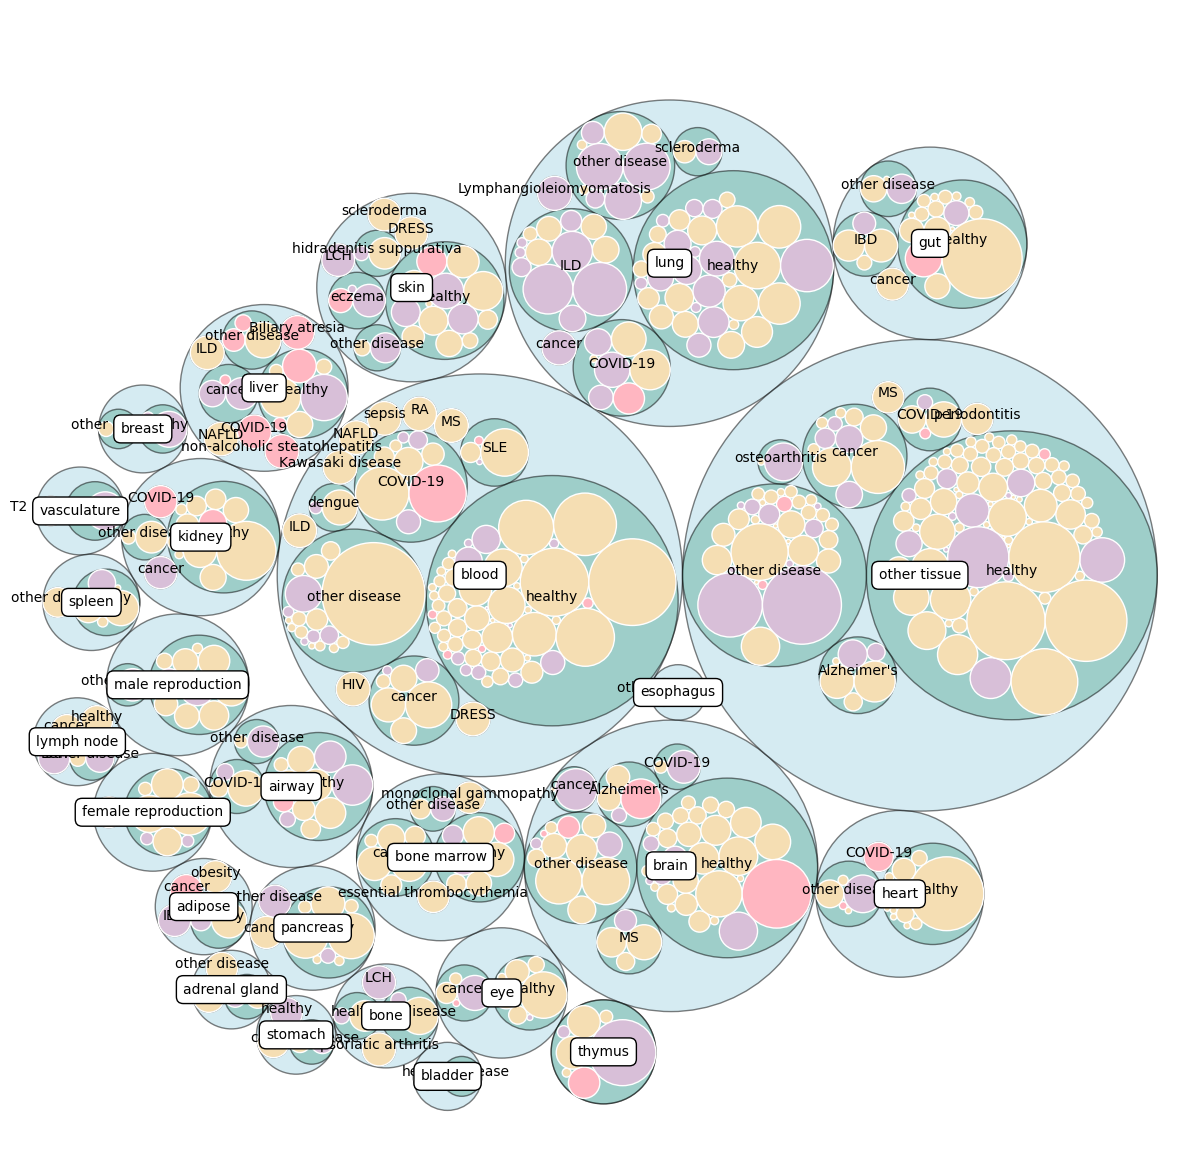

In [51]:
draw_circles(circ_data, filename="../scratch/train_valid_test_ood_circles.pdf")

# Figure 2

In [ ]:
import pandas as pd
import tiledb

In [ ]:
cell_tdb = tiledb.open('/projects/global/gred/resbioai/CeLLM/tiledb/scimilarity_human_10x_cell_metadata/', mode='r')

In [ ]:
load_file =  cell_tdb.df[:]

In [ ]:
duplicate_rows = load_file.drop_duplicates(subset=['sample'],inplace=False)

In [ ]:
plt.bar(duplicate_rows['disease'].value_counts().index[0:10], duplicate_rows['disease'].value_counts().values[0:10], ); plt.xticks(rotation=90)

In [ ]:
plt.bar(duplicate_rows['tissue'].value_counts().index[0:10], duplicate_rows['tissue'].value_counts().values[0:10], ); plt.xticks(rotation=90)

# Figure 3-4 are also discussed in the Figure2.ipynb.

# Figure 9 can be plotted based on codes in Figure5.ipynb
